<a href="https://colab.research.google.com/github/daichi-a/PythonDataAnalyzeClassMaterial/blob/master/correlation_east_japan_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

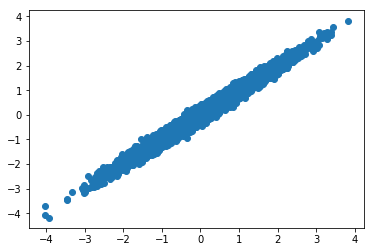

In [0]:
# 相関のイメージをグラフ上に表示
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
 
# 平均を指定
mean = np.array([0.0, 0.0])
# 共分散行列を生成
cov = np.array([[1., 0.99], [0.99, 1]])
 
# 2次元正規乱数を1万個生成
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.scatter(x, y)
plt.show()

In [0]:
from google.colab import files
uploaded = files.upload()

Saving tohoku-kanto-aug.csv to tohoku-kanto-aug.csv


In [0]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# DataFrameの変数はdfにするのが一般的
df = pd.read_csv('tohoku-kanto-aug.csv', encoding='SHIFT-JIS', header=2)
# headerは2行読み飛ばす，という意味
# エディタで確認するとわかる通り，余計なものが入っているので

# 頭から数行，数列を見せてくれる．
# Google Colaboratoryの場合，セルの最後で実行すると，綺麗に色分けして見せてくれる
# 途中で実行する場合には，　print(df.head()) とすること．
df.head()

,Unnamed: 0,青森,青森.1,青森.2,青森.3,青森.4,青森.5,青森.6,青森.7,青森.8,青森.9,青森.10,青森.11,秋田,秋田.1,秋田.2,秋田.3,秋田.4,秋田.5,秋田.6,秋田.7,秋田.8,秋田.9,秋田.10,秋田.11,盛岡,盛岡.1,盛岡.2,盛岡.3,盛岡.4,盛岡.5,盛岡.6,盛岡.7,盛岡.8,盛岡.9,盛岡.10,盛岡.11,山形,山形.1,山形.2,...,甲府.8,甲府.9,甲府.10,甲府.11,千葉,千葉.1,千葉.2,千葉.3,千葉.4,千葉.5,千葉.6,千葉.7,千葉.8,千葉.9,千葉.10,千葉.11,東京,東京.1,東京.2,東京.3,東京.4,東京.5,東京.6,東京.7,東京.8,東京.9,東京.10,東京.11,横浜,横浜.1,横浜.2,横浜.3,横浜.4,横浜.5,横浜.6,横浜.7,横浜.8,横浜.9,横浜.10,横浜.11
0,年月,平均気温(℃),平均気温(℃),平均気温(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),平均気温(℃),平均気温(℃),平均気温(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),平均気温(℃),平均気温(℃),平均気温(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),平均気温(℃),平均気温(℃),平均気温(℃),...,日最低気温の平均(℃),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),平均気温(℃),平均気温(℃),平均気温(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),平均気温(℃),平均気温(℃),平均気温(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),平均気温(℃),平均気温(℃),平均気温(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最高気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日),日平均気温25℃以上日数(日)
1,NaN,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,...,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号
2,1977/8,21.5,8,1,26.0,8,1,17.9,8,1,4,8,1,22.9,8,1,26.5,8,1,19.4,8,1,6,8,1,21.6,8,1,26.0,8,1,18.1,8,1,4,8,1,22.9,8,1,...,1,12,8,1,24.3,8,1,27.5,8,1,21.5,8,1,13,8,1,25.0,8,1,28.4,8,1,22.3,8,1,19,8,1,24.4,8,1,27.7,8,1,21.8,8,1,15,8,1
3,1978/8,24.0,8,1,29.2,8,1,19.6,8,1,11,8,1,25.3,8,1,29.4,8,1,21.6,8,1,20,8,1,24.3,8,1,29.8,8,1,19.6,8,1,13,8,1,25.8,8,1,...,1,30,8,1,27.9,8,1,31.6,8,1,24.8,8,1,30,8,1,28.9,8,1,33.0,8,1,25.6,8,1,31,8,1,27.8,8,1,32.1,8,1,24.8,8,1,31,8,1
4,1979/8,22.6,8,1,27.6,8,1,18.0,8,1,5,8,1,24.0,8,1,28.2,8,1,20.0,8,1,8,8,1,22.9,8,1,28.1,8,1,18.1,8,1,8,8,1,24.5,8,1,...,1,21,8,1,26.7,8,1,30.2,8,1,24.0,8,1,26,8,1,27.4,8,1,31.0,8,1,24.6,8,1,27,8,1,26.6,8,1,30.5,8,1,24.0,8,1,25,8,1


In [0]:
# DataFrameでは，この状態で一番上の行が「列の名前」として認識され，操作することができる．
# 列の名前になっているので，この行を行番号では操作できなくなる．

# for文で余計な「列」を削除する
# 品質情報，均質番号の列がいらない
# 青森であれば，青森1, 2, 4, 5, 7, 8, 10, 11がいらない

for a_column in ['青森', '秋田', '盛岡', '山形', '仙台', '福島', '水戸', '宇都宮', 'さいたま', '前橋', '甲府', '千葉', '東京', '横浜']:
  for i in range(1, 11, 3):
    for j in range(0, 2, 1):
      df = df.drop(a_column + '.' + str(i + j), axis=1)

      # dropの時に行番号や列番号，行の名前や列の名前をいれるが，
      # 標準だと「行」の削除が行われれ，
      # axis=1というオプションを入れると「列」で削除が行われる

df.head()

,Unnamed: 0,青森,青森.3,青森.6,青森.9,秋田,秋田.3,秋田.6,秋田.9,盛岡,盛岡.3,盛岡.6,盛岡.9,山形,山形.3,山形.6,山形.9,仙台,仙台.3,仙台.6,仙台.9,福島,福島.3,福島.6,福島.9,水戸,水戸.3,水戸.6,水戸.9,宇都宮,宇都宮.3,宇都宮.6,宇都宮.9,さいたま,さいたま.3,さいたま.6,さいたま.9,前橋,前橋.3,前橋.6,前橋.9,甲府,甲府.3,甲府.6,甲府.9,千葉,千葉.3,千葉.6,千葉.9,東京,東京.3,東京.6,東京.9,横浜,横浜.3,横浜.6,横浜.9
0,年月,平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1977/8,21.5,26.0,17.9,4,22.9,26.5,19.4,6,21.6,26.0,18.1,4,22.9,27.6,19.2,6,22.7,26.1,20.2,6,23.3,27.3,20.2,10,23.1,26.9,20.1,8,23.2,27.0,20.1,7,NaN,NaN,NaN,NaN,23.9,27.8,20.8,11,24.5,29.1,21.4,12,24.3,27.5,21.5,13,25.0,28.4,22.3,19,24.4,27.7,21.8,15
3,1978/8,24.0,29.2,19.6,11,25.3,29.4,21.6,20,24.3,29.8,19.6,13,25.8,31.8,20.8,19,25.6,29.8,22.0,19,26.6,32.2,22.0,23,26.6,32.3,22.0,25,26.6,32.2,22.2,25,27.6,33.0,23.0,29,27.7,33.7,22.8,29,27.1,33.7,22.3,30,27.9,31.6,24.8,30,28.9,33.0,25.6,31,27.8,32.1,24.8,31
4,1979/8,22.6,27.6,18.0,5,24.0,28.2,20.0,8,22.9,28.1,18.1,8,24.5,30.0,19.9,14,24.9,28.9,21.6,14,25.4,30.6,21.5,20,25.4,29.7,22.0,22,25.5,30.0,22.1,20,26.2,30.3,23.0,23,26.0,30.8,22.4,22,25.9,31.6,22.2,21,26.7,30.2,24.0,26,27.4,31.0,24.6,27,26.6,30.5,24.0,25


In [0]:
# 1行目 (0行目ではなく)が余計なので削除しておく
df = df.drop(1)

# 再度確認
df.head()

,Unnamed: 0,青森,青森.3,青森.6,青森.9,秋田,秋田.3,秋田.6,秋田.9,盛岡,盛岡.3,盛岡.6,盛岡.9,山形,山形.3,山形.6,山形.9,仙台,仙台.3,仙台.6,仙台.9,福島,福島.3,福島.6,福島.9,水戸,水戸.3,水戸.6,水戸.9,宇都宮,宇都宮.3,宇都宮.6,宇都宮.9,さいたま,さいたま.3,さいたま.6,さいたま.9,前橋,前橋.3,前橋.6,前橋.9,甲府,甲府.3,甲府.6,甲府.9,千葉,千葉.3,千葉.6,千葉.9,東京,東京.3,東京.6,東京.9,横浜,横浜.3,横浜.6,横浜.9
0,年月,平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日),平均気温(℃),日最高気温の平均(℃),日最低気温の平均(℃),日平均気温25℃以上日数(日)
2,1977/8,21.5,26.0,17.9,4,22.9,26.5,19.4,6,21.6,26.0,18.1,4,22.9,27.6,19.2,6,22.7,26.1,20.2,6,23.3,27.3,20.2,10,23.1,26.9,20.1,8,23.2,27.0,20.1,7,NaN,NaN,NaN,NaN,23.9,27.8,20.8,11,24.5,29.1,21.4,12,24.3,27.5,21.5,13,25.0,28.4,22.3,19,24.4,27.7,21.8,15
3,1978/8,24.0,29.2,19.6,11,25.3,29.4,21.6,20,24.3,29.8,19.6,13,25.8,31.8,20.8,19,25.6,29.8,22.0,19,26.6,32.2,22.0,23,26.6,32.3,22.0,25,26.6,32.2,22.2,25,27.6,33.0,23.0,29,27.7,33.7,22.8,29,27.1,33.7,22.3,30,27.9,31.6,24.8,30,28.9,33.0,25.6,31,27.8,32.1,24.8,31
4,1979/8,22.6,27.6,18.0,5,24.0,28.2,20.0,8,22.9,28.1,18.1,8,24.5,30.0,19.9,14,24.9,28.9,21.6,14,25.4,30.6,21.5,20,25.4,29.7,22.0,22,25.5,30.0,22.1,20,26.2,30.3,23.0,23,26.0,30.8,22.4,22,25.9,31.6,22.2,21,26.7,30.2,24.0,26,27.4,31.0,24.6,27,26.6,30.5,24.0,25
5,1980/8,19.6,23.5,16.2,0,22.3,26.5,18.7,1,19.8,24.3,16.0,0,21.3,26.0,17.6,0,20.1,22.9,17.9,0,21.0,24.6,18.2,0,21.3,25.1,18.5,2,22.1,26.2,19.2,1,22.8,26.3,20.0,5,22.6,26.3,19.9,5,24.2,28.9,21.1,6,22.6,26.1,20.0,4,23.4,26.6,20.7,8,23.0,26.3,20.6,5


In [0]:
# 「地名」の列は8月の平均気温，
# 「地名.3」の列は8月の日最高気温の平均
# 「地名.6」の列は8月の日最低気温の平均
# 「地名.9」の列は8月の日平均気温が25℃以上の日数
# を記録したら，その説明が入っている0行目と，年月が入っている0列目を削除

df = df.drop(0)
df = df.drop('Unnamed: 0', axis=1)

# データを確認．dataframeの中のvaluesという変数に入っている
print(df.values)

# shapeつまり次元を確認．
print(df.values.shape)

[['21.5' '26.0' '17.9' ... '27.7' '21.8' '15']
 ['24.0' '29.2' '19.6' ... '32.1' '24.8' '31']
 ['22.6' '27.6' '18.0' ... '30.5' '24.0' '25']
 ...
 ['24.5' '28.7' '21.0' ... '31.3' '24.5' '29']
 ['22.0' '26.3' '18.9' ... '30.4' '24.0' '22']
 ['22.8' '27.4' '19.3' ... '32.1' '25.3' '26']]
(42, 56)


In [0]:
# 42年分のデータがある

# 緯度の配列を作成して，対応させる
# 青森の8月の平均気温を1次元配列として取り出して，数字の配列にする
aomori_ave = df.loc[:, '青森'].values.astype('float32')
# locは行と列を指定して，配列として取り出す 
# :は0~あるだけ，という意味
# つまり行は0~あるだけ（42年分) 列は'青森'を取り出したということ
# そのあとnumpy配列にするため，valuesを使い，さらに文字列から数字に変更している
print('青森市の8月の平均気温42年分', aomori_ave)

# 青森市は北緯40.49度
aomori_longi = np.repeat(40.49, 42)
# 40.49を42年分繰り返した配列を作る
print('青森市の8月の緯度42年分', aomori_longi)

#当たり前だが，何月だろうと何年だろうと，緯度は変わらないので，同じ数字が続く配列になる．

青森市の8月の平均気温42年分 [21.5 24.  22.6 19.6 22.1 23.5 23.8 24.5 25.7 22.7 21.8 23.3 23.8 24.5
 21.5 22.5 20.6 25.9 23.6 22.2 22.7 22.  25.8 24.8 21.4 21.9 21.3 23.1
 24.9 24.4 24.6 21.9 21.9 26.  24.2 25.3 24.7 23.6 23.6 24.5 22.  22.8]
青森市の8月の緯度42年分 [40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49
 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49
 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49 40.49
 40.49 40.49 40.49 40.49 40.49 40.49]


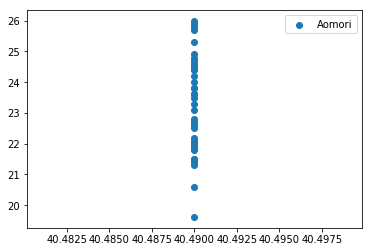

In [0]:
# 散布図として描画する
import matplotlib.pyplot as plt
plt.scatter(aomori_longi, aomori_ave, label='Aomori')
#判例を表示する
plt.legend()
plt.show()

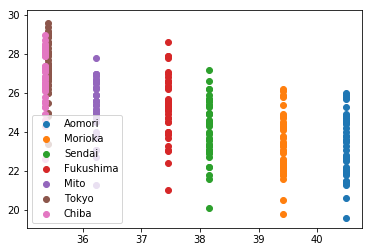

In [0]:
# 同様に盛岡，仙台，福島，水戸，千葉，東京の太平洋側の県庁所在地各地についても行い，散布図として追加描画する
# セルが違う = 描画されるグラフが違うので，まず青森を再描画する
plt.scatter(aomori_longi, aomori_ave, label='Aomori')

# 盛岡以南
morioka_ave = df.loc[:, '盛岡'].values.astype('float32')
morioka_longi = np.repeat(39.42, 42) #盛岡市は北緯39.42
plt.scatter(morioka_longi, morioka_ave, label='Morioka')

sendai_ave = df.loc[:, '仙台'].values.astype('float32')
sendai_longi = np.repeat(38.16, 42) #仙台市は北緯38.16
plt.scatter(sendai_longi, sendai_ave, label='Sendai')

fukushima_ave = df.loc[:, '福島'].values.astype('float32')
fukushima_longi = np.repeat(37.45, 42) #福島市は北緯37.45
plt.scatter(fukushima_longi, fukushima_ave, label='Fukushima')

mito_ave = df.loc[:, '水戸'].values.astype('float32')
mito_longi = np.repeat(36.22, 42) #水戸市は北緯36．22
plt.scatter(mito_longi, mito_ave, label='Mito')

tokyo_ave = df.loc[:, '東京'].values.astype('float32')
tokyo_longi = np.repeat(35.41, 42) #千代田区役所は北緯35.41
plt.scatter(tokyo_longi, tokyo_ave, label='Tokyo')

chiba_ave = df.loc[:, '千葉'].values.astype('float32')
chiba_longi = np.repeat(35.36, 42) #千葉市は北緯35.36
plt.scatter(chiba_longi, chiba_ave, label='Chiba')

plt.legend()
plt.show()


In [0]:
# さてここまでできたら，緯度と8月の平均気温の相関を計算する

# 北から順番に8月の平均気温配列と，緯度配列を連携つしていく．
# 順番を間違えると，緯度と気温の対応が取れなくなる
all_point_ave = np.concatenate([aomori_ave, morioka_ave, sendai_ave, fukushima_ave, mito_ave, tokyo_ave, chiba_ave])
all_point_longi = np.concatenate([aomori_longi, morioka_longi, sendai_longi, fukushima_longi, mito_longi, tokyo_longi, chiba_longi])

# pandasのSeriesに変換する
# pandasの2次元の表がDataFrameで，1次元配列がSeries
all_point_ave_series = pd.Series(all_point_ave)
all_point_longi_series = pd.Series(all_point_longi)

# 相関を計算する
correlation_coefficient = all_point_longi_series.corr(all_point_ave_series)

print('東日本の太平洋側の都市の緯度と8月の平均気温の相関係数は', correlation_coefficient)

東日本の太平洋側の都市の緯度と8月の平均気温の相関係数は -0.6768226395347305


相関係数が，-0.677なので，結構高めの負の相関があることになる．

緯度が大きくなればなるほど，8月の平均気温が低くなるので，傾きがマイナス．

相関係数を出してくれるだけなので，あまり実用的ではないが，同じく8月の日最高気温，日最低気温，日平均気温25℃以上の日数についてもやってみて，相関係数が高いものを見つける．

In [0]:
# 8月の日最高気温の平均，8月の日最低気温の平均，25度以上の日数をそれぞれ格納する
aomori_max_ave = df.loc[:, '青森.3'].values.astype('float32')
aomori_min_ave = df.loc[:, '青森.6'].values.astype('float32')
aomori_count_25over = df.loc[:, '青森.9'].values.astype('uint8') #日数は0もしくは正の整数なので

morioka_max_ave = df.loc[:, '盛岡.3'].values.astype('float32')
morioka_min_ave = df.loc[:, '盛岡.6'].values.astype('float32')
morioka_count_25over = df.loc[:, '盛岡.9'].values.astype('uint8')

sendai_max_ave = df.loc[:, '仙台.3'].values.astype('float32')
sendai_min_ave = df.loc[:, '仙台.6'].values.astype('float32')
sendai_count_25over = df.loc[:, '仙台.9'].values.astype('uint8')

fukushima_max_ave = df.loc[:, '福島.3'].values.astype('float32')
fukushima_min_ave = df.loc[:, '福島.6'].values.astype('float32')
fukushima_count_25over = df.loc[:, '福島.9'].values.astype('uint8')

mito_max_ave = df.loc[:, '水戸.3'].values.astype('float32')
mito_min_ave = df.loc[:, '水戸.6'].values.astype('float32')
mito_count_25over = df.loc[:, '水戸.9'].values.astype('uint8')

tokyo_max_ave = df.loc[:, '東京.3'].values.astype('float32')
tokyo_min_ave = df.loc[:, '東京.6'].values.astype('float32')
tokyo_count_25over = df.loc[:, '東京.9'].values.astype('uint8')

chiba_max_ave = df.loc[:, '千葉.3'].values.astype('float32')
chiba_min_ave = df.loc[:, '千葉.6'].values.astype('float32')
chiba_count_25over = df.loc[:, '千葉.9'].values.astype('uint8')

# 連結する
all_point_max_ave = np.concatenate([aomori_max_ave, morioka_max_ave, sendai_max_ave, fukushima_max_ave, mito_max_ave, tokyo_max_ave, chiba_max_ave])
all_point_min_ave = np.concatenate([aomori_min_ave, morioka_min_ave, sendai_min_ave, fukushima_min_ave, mito_min_ave, tokyo_min_ave, chiba_min_ave])
all_point_count_25over = np.concatenate([aomori_count_25over, morioka_count_25over, sendai_count_25over, fukushima_count_25over, mito_count_25over, tokyo_count_25over, chiba_count_25over])

# pandasのSeriesに変換
all_point_max_ave_series = pd.Series(all_point_max_ave)
all_point_min_ave_series = pd.Series(all_point_min_ave)
all_point_count_25over_series = pd.Series(all_point_count_25over)

# 相関係数を出す
coefficient_max_ave = all_point_longi_series.corr(all_point_max_ave_series)
coefficient_min_ave = all_point_longi_series.corr(all_point_min_ave_series)
coefficient_count_25over = all_point_longi_series.corr(all_point_count_25over_series)

print('東日本の太平洋側の都市の緯度と8月の日最高気温平均の相関係数は', coefficient_max_ave)
print('東日本の太平洋側の都市の緯度と8月の日最低気温平均の相関係数は', coefficient_min_ave)
print('東日本の太平洋側の都市の緯度と8月の25℃を超えた日数の相関係数は', coefficient_count_25over)

東日本の太平洋側の都市の緯度と8月の日最高気温平均の相関係数は -0.5206503321172122
東日本の太平洋側の都市の緯度と8月の日最低気温平均の相関係数は -0.7595445362207282
東日本の太平洋側の都市の緯度と8月の25℃を超えた日数の相関係数は -0.6830720670305753


結果を見ると，緯度との相関係数が一番高いのは「25℃を超えた日数」であることがわかった．

ただし相関係数は本当にざっくりとしたことしか言えないので，統計的に考えていくならば，次の線形回帰分析に行く．